# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [57]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
df = pd.read_csv('assets/real_estate.csv', sep=';')
df

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [59]:
#Cuantas casas tienen precio 0 

print(f'Las casas con precio 0 son: {df[df["price"] == 0].shape[0]}')
#borrar las casas con precio 0
df = df[df["price"] != 0]


Las casas con precio 0 son: 60


In [60]:
#datos duplicados
print(f'Hay {df.duplicated().sum()} datos duplicados')

Hay 0 datos duplicados


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [61]:
casa_mas_cara = df[df['price'] == df['price'].max()]
casa_mas_cara
print(f'La casa más cara es la de {casa_mas_cara.iloc[0]["address"]} y cuesta {casa_mas_cara.iloc[0]["price"]} USD')

La casa más cara es la de El Escorial y cuesta 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [62]:
casa_mas_barata = df[df['price'] == df['price'].min()]
casa_mas_barata

print(f'La casa más barata es la de {casa_mas_barata.iloc[0]["address"]} y cuesta {casa_mas_barata.iloc[0]["price"]} USD')

La casa más barata es la de Berlin, Coslada y cuesta 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [63]:
casa_mas_grande = df[df['surface'] == df['surface'].max()]
casa_mas_grande
print(f'La casa más grande es la de {casa_mas_grande.iloc[0]["address"]} y tiene un área de {casa_mas_grande.iloc[0]["surface"]} metros')
casa_mas_pequena = df[df['surface'] == df['surface'].min()]
casa_mas_pequena
print(f'La casa más pequeña es la de {casa_mas_pequena.iloc[0]["address"]} y tiene un área de {casa_mas_pequena.iloc[0]["surface"]} metros')

La casa más grande es la de Sevilla la Nueva y tiene un área de 249000.0 metros
La casa más pequeña es la de Calle Amparo,  Madrid Capital y tiene un área de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [64]:
poblaciones = df['level5'].unique()
print(f'Hay {len(poblaciones)} poblaciones en el dataset')

Hay 168 poblaciones en el dataset


#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [65]:
print(f'El dataset contiene valores no admitidos? {df.isna().values.any()}')

El dataset contiene valores no admitidos? True


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [66]:
#cuantos valores Na hay en cada columna
print(df.isna().sum())
#Eliminar columna: customZone, zipCode, level8, level7, level6, level4, Unnamed:0 (no aportan información relevante)
df = df.drop(columns=['customZone', 'zipCode','level6','level7','level8','level4']) 
df
#borrar Nas del dataset
df = df.dropna()
df

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      789
url_inmueble            0
rooms                 350
bathrooms             339
surface              1245
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6632
level5                  0
level6              14570
level7               2265
level8               8530
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15275
customZone          15275
dtype: int64


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"
5,6,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,...,0,0,0,0,0,0,0,0,"40,53391","-3,89445"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15329,15330,153901392,False,pqcentro,912665783.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,122.0,264500,...,0,0,0,0,0,0,0,1,"40,24007","-3,70606"
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,0,0,"40,45416","-3,70286"
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,0,0,"40,36652","-3,48951"
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,0,0,"40,36967","-3,48105"


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [67]:
#Cual es la media de precios en la poblacion (columna level5) de "Arroyomolinos (Madrid)"?
media_precio_arroyomolinos = df[df['level5'] == 'Arroyomolinos (Madrid)']['price'].mean()
media_precio_arroyomolinos = round(media_precio_arroyomolinos, 2)
print(f'La media de precios en Arroyomolinos (Madrid) es de {media_precio_arroyomolinos} USD')

La media de precios en Arroyomolinos (Madrid) es de 298780.22 USD


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


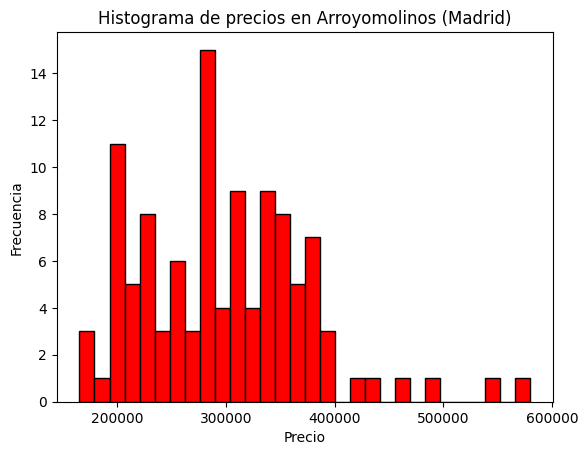

In [68]:
import matplotlib.pyplot as plt
df_arroyomolinos = df[df['level5'] == 'Arroyomolinos (Madrid)']
plt.hist(df_arroyomolinos['price'], bins=30, color='red', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios en Arroyomolinos (Madrid)')
plt.show()

Observación: 
- Distribución sesgada hacía la izquierda, lo que indica que la distribución de precios esta orientada a precios menor que 400.000 USD.
- Tendencia de casas con precio cercano a 300.000 USD lo que sugiere como común en la zona.
- Las casas con precio mayor a 400.000 USD son menos comunes. La casa con un valor cercano a los 600.000 USD es la casa más cara de la zona de Arroyomolinos. 

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [69]:
#precio promedio de Valdemorillo
media_precio_valdemorillo = df[df['level5'] == 'Valdemorillo']['price'].mean()
print(f'El precio promedio de Valdemorillo es de {media_precio_valdemorillo} USD')
#precio promedio de Galapagar
media_precio_galapagar = df[df['level5'] == 'Galapagar']['price'].mean()
print(f'El precio promedio de Galapagar es de {media_precio_galapagar} USD')
diferencia = media_precio_valdemorillo - media_precio_galapagar
print(f'La diferencia de precios entre Valdemorillo y Galapagar es de {diferencia} USD')

El precio promedio de Valdemorillo es de 384269.5652173913 USD
El precio promedio de Galapagar es de 381106.70149253734 USD
La diferencia de precios entre Valdemorillo y Galapagar es de 3162.86372485396 USD


Observación:
- Loa precios promedios de Valdemorillo y Galapagar son semejantes.
- Hay una diferenciación de 3162 USD. Siendo la población Valdemorillo más cara.

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [70]:
df['pps'] = df['price'] / df['surface']
pps_valdemorillo = df[df['level5'] == 'Valdemorillo']['pps'].mean()
print(f'El precio promedio por metro cuadrado en Valdemorillo es de {pps_valdemorillo} USD/m2')
pps_galapagar = df[df['level5'] == 'Galapagar']['pps'].mean()
print(f'El precio promedio por metro cuadrado en Galapagar es de {pps_galapagar} USD/m2')

El precio promedio por metro cuadrado en Valdemorillo es de 1321.766036146825 USD/m2
El precio promedio por metro cuadrado en Galapagar es de 1566.51539198496 USD/m2


Observaciónes:
- Se observa que la población Galapagar hay mayor plusvalía.
- Aunque el promedio de precios de ambas poblaciones son semejantes, Las casas de Valdemorillo serían más grandes que Galapagar.

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

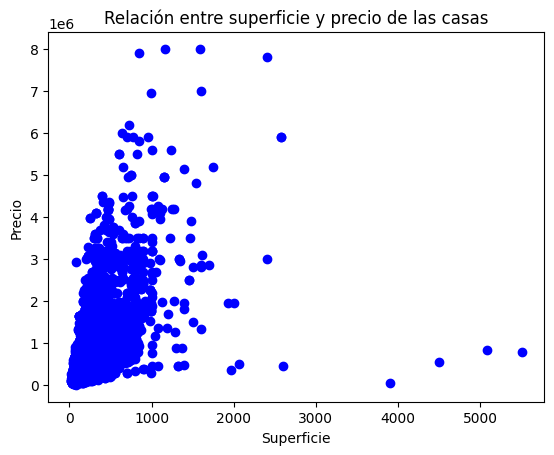

In [71]:
#drop el valor de superficie por arriba de 200000
df = df[df['surface'] < 200000]
#Analiza la relacion entre la superficie y el precio de las casas. Haz un scatter plot y comenta qué observas
plt.scatter(df['surface'], df['price'], color='blue')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('Relación entre superficie y precio de las casas')
plt.show()

Observación:
- Se observa una una relación positiva.
- Hay anomalías en los datos que entorpecen la visualización del grafico
- Estas anomalías o outlier, pueden ser considerados terrenos o parcelas en los alrededores de Madrid por un valor inferior a 100.000 USD

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [72]:
print(f'Hay {df["realEstate_name"].nunique()} agencias de bienes raíces en el dataset')

Hay 1438 agencias de bienes raíces en el dataset


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [73]:
poblacion_mas_casas = df['level5'].value_counts().idxmax()
print(f'La población con más casas es {poblacion_mas_casas}')

La población con más casas es  Madrid Capital


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [74]:
df_subconjunto = df[df['level5'].isin(['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'])]
df_subconjunto


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,pps
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",1034.883721
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,0,"40,31933","-3,77574",2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,0,"40,3313411","-3,8313868",2992.957746
161,162,153440116,False,prolucisa,916350416.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,123.0,239500,...,0,0,0,0,0,0,0,"40,2744807718156","-3,79192471504211",1947.154472
169,170,153920011,False,grupo tizona,911226046.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,2.0,195.0,290000,...,0,0,0,0,0,0,0,"40,31111","-3,73066",1487.179487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,0,1,"40,31381","-3,83733",1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,0,"40,3259051","-3,76318",2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,0,"40,2882193","-3,8098617",2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,0,"40,28282","-3,78892",1230.769231


#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

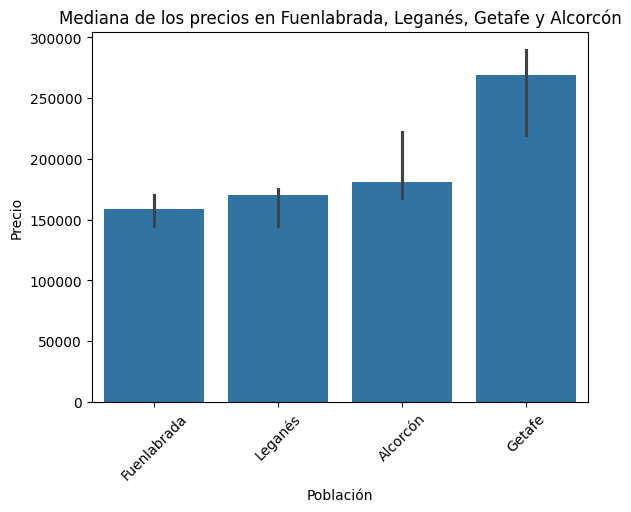

In [75]:
import seaborn as sns
sns.barplot(x='level5', y='price', data=df_subconjunto, estimator='median')
plt.xticks(rotation=45)
plt.xlabel('Población')
plt.ylabel('Precio')
plt.title('Mediana de los precios en Fuenlabrada, Leganés, Getafe y Alcorcón')
plt.show()

Observaciones:
- Se puede apreciar que en la población Getafe predomina una mediana mayor que en las otras tres poblaciones, osilando entre 250.000 USD a 300.000 USD. 
- Las Poblaciones Fuenlabrada, Leganés y Alcorcón, comparten semejanza entre si. Destacando la población Alcorcón con mayor mediana de las tres.

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [76]:
media_precio = df_subconjunto['price'].mean()
varianza_precio = df_subconjunto['price'].var()
media_habitaciones = df_subconjunto['rooms'].mean()
varianza_habitaciones = df_subconjunto['rooms'].var()
media_superficie = df_subconjunto['surface'].mean()
varianza_superficie = df_subconjunto['surface'].var()
media_banos = df_subconjunto['bathrooms'].mean()
varianza_banos = df_subconjunto['bathrooms'].var()
print(f'Media de precio: {media_precio}')
print(f'Varianza de precio: {varianza_precio}')
print(f'Media de habitaciones: {media_habitaciones}')
print(f'Varianza de habitaciones: {varianza_habitaciones}')
print(f'Media de superficie: {media_superficie}')
print(f'Varianza de superficie: {varianza_superficie}')
print(f'Media de baños: {media_banos}')
print(f'Varianza de baños: {varianza_banos}')

Media de precio: 223970.15877437327
Varianza de precio: 14770653355.849234
Media de habitaciones: 3.0097493036211698
Varianza de habitaciones: 0.7125965897833358
Media de superficie: 109.85515320334262
Varianza de superficie: 4271.080803254041
Media de baños: 1.6100278551532032
Varianza de baños: 0.5617960940626178


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [77]:
casa_fuenlabrada_mas_cara = df_subconjunto[df_subconjunto['level5'] == 'Fuenlabrada'].sort_values('price', ascending=False).iloc[0]
casa_leganes_mas_cara = df_subconjunto[df_subconjunto['level5'] == 'Leganés'].sort_values('price', ascending=False).iloc[0]
casa_getafe_mas_cara = df_subconjunto[df_subconjunto['level5'] == 'Getafe'].sort_values('price', ascending=False).iloc[0]
casa_alcorcon_mas_cara = df_subconjunto[df_subconjunto['level5'] == 'Alcorcón'].sort_values('price', ascending=False).iloc[0]
print(f'La casa más cara de Fuenlabrada es la de {casa_fuenlabrada_mas_cara["address"]} y cuesta {casa_fuenlabrada_mas_cara["price"]} USD')
print(f'La casa más cara de Leganés es la de {casa_leganes_mas_cara["address"]} y cuesta {casa_leganes_mas_cara["price"]} USD')
print(f'La casa más cara de Getafe es la de {casa_getafe_mas_cara["address"]} y cuesta {casa_getafe_mas_cara["price"]} USD')
print(f'La casa más cara de Alcorcón es la de {casa_alcorcon_mas_cara["address"]} y cuesta {casa_alcorcon_mas_cara["price"]} USD')

La casa más cara de Fuenlabrada es la de Calle de Paulo Freire, 5, Fuenlabrada y cuesta 490000 USD
La casa más cara de Leganés es la de Avenida Reina Sofía, Leganés y cuesta 650000 USD
La casa más cara de Getafe es la de Getafe y cuesta 1050000 USD
La casa más cara de Alcorcón es la de Alcorcón y cuesta 950000 USD


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_6097/646595040.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Poblaciones")


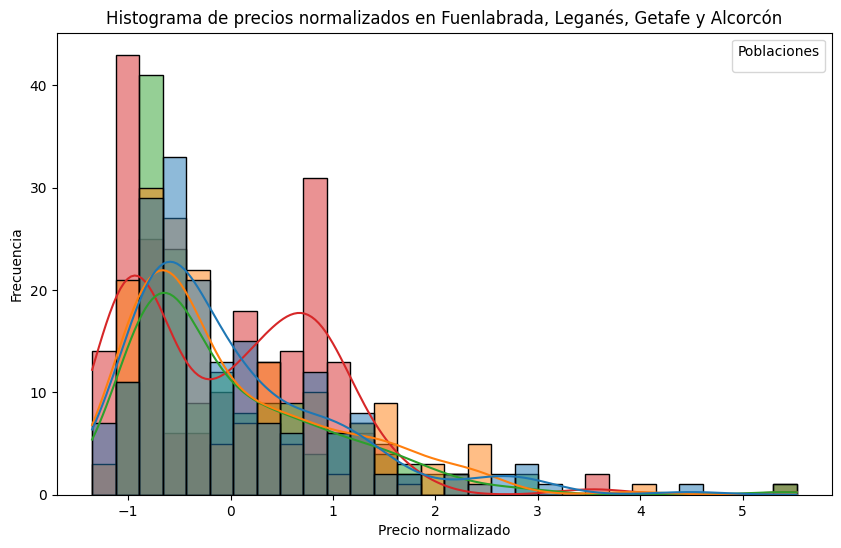

In [78]:
df_subconjunto = df_subconjunto.copy()
df_subconjunto['price_normalized'] = df_subconjunto.groupby('level5')['price'].transform(
    lambda x: (x - x.mean()) / x.std()
)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_subconjunto, x='price_normalized', hue='level5', kde=True, bins=30, alpha=0.5)

plt.xlabel("Precio normalizado")
plt.ylabel("Frecuencia")
plt.title("Histograma de precios normalizados en Fuenlabrada, Leganés, Getafe y Alcorcón")
plt.legend(title="Poblaciones")
plt.show()

Observación
- Leganés y Getafe parecen tener precios más centrados alrededor de 0.
- Alcorcón (rojo) muestra una mayor dispersión con más casos extremos.
- Fuenlabrada (verde) parece tener una alta concentración de precios bajos.

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [79]:
pps_getafe = df_subconjunto[df_subconjunto['level5'] == 'Getafe']['pps'].mean()
pps_alcorcon = df_subconjunto[df_subconjunto['level5'] == 'Alcorcón']['pps'].mean()
print(f'El precio promedio por metro cuadrado en Getafe es de {pps_getafe} USD/m2')
print(f'El precio promedio por metro cuadrado en Alcorcón es de {pps_alcorcon} USD/m2')
print(f'La diferencia de precios por metro cuadrado entre Getafe y Alcorcón es de {pps_alcorcon - pps_getafe} USD/m2')

El precio promedio por metro cuadrado en Getafe es de 2198.0946436473087 USD/m2
El precio promedio por metro cuadrado en Alcorcón es de 2244.5684836556106 USD/m2
La diferencia de precios por metro cuadrado entre Getafe y Alcorcón es de 46.47384000830198 USD/m2


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

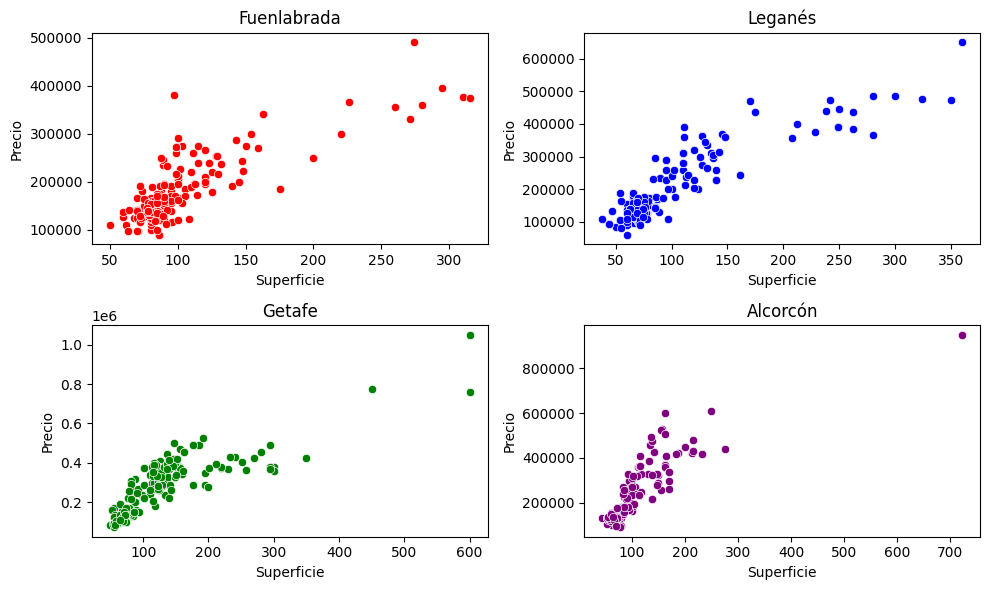

In [80]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_subconjunto[df_subconjunto['level5'] == 'Fuenlabrada'], x='surface', y='price', color='red')
plt.title('Fuenlabrada')
plt.xlabel('Superficie')
plt.ylabel('Precio')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df_subconjunto[df_subconjunto['level5'] == 'Leganés'], x='surface', y='price', color='blue')
plt.title('Leganés')
plt.xlabel('Superficie')
plt.ylabel('Precio')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_subconjunto[df_subconjunto['level5'] == 'Getafe'], x='surface', y='price', color='green')
plt.title('Getafe')
plt.xlabel('Superficie')
plt.ylabel('Precio')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_subconjunto[df_subconjunto['level5'] == 'Alcorcón'], x='surface', y='price', color='purple')
plt.title('Alcorcón')
plt.xlabel('Superficie')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [81]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center=(60, -2.2), zoom=2, min_zoom=1, max_zoom=20, 
          basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [82]:
print(df_subconjunto[['latitude', 'longitude']].head())
# Reemplazar comas por puntos en las columnas 'latitude' y 'longitude'
df_subconjunto['latitude'] = df_subconjunto['latitude'].str.replace(',', '.').astype(float)
df_subconjunto['longitude'] = df_subconjunto['longitude'].str.replace(',', '.').astype(float)

# Verificar el resultado
print(df_subconjunto[['latitude', 'longitude']].head())


             latitude          longitude
3    40,2853785786438  -3,79508142135624
94           40,31933           -3,77574
109        40,3313411         -3,8313868
161  40,2744807718156  -3,79192471504211
169          40,31111           -3,73066
      latitude  longitude
3    40.285379  -3.795081
94   40.319330  -3.775740
109  40.331341  -3.831387
161  40.274481  -3.791925
169  40.311110  -3.730660


In [ ]:
from ipyleaflet import Map, basemaps, CircleMarker

map = Map(center=(40.416775, -3.703790), zoom=12, min_zoom=1, max_zoom=20,
          basemap=basemaps.OpenStreetMap.Mapnik)

colores = {
    'Fuenlabrada': 'red',
    'Leganés': 'blue',
    'Getafe': 'green',
    'Alcorcón': 'purple'
}

for index, row in df_subconjunto.iterrows():
    latitud = row['latitude']
    longitud = row['longitude']
    poblacion = row['level5']
    
    color = colores.get(poblacion, 'gray')  
    
    punto = CircleMarker(
        location=(latitud, longitud),  
        radius=5,  
        color=color,  
        fill_color=color,  
        fill_opacity=0.7,  
        weight=1  
    )
    
    
    map.add_layer(punto)

map

Map(center=[40.416775, -3.70379], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …